# Business goal:
To target specific customer behaviors or infomation, the following
codes showcase the historical data to assist of finding trend that
focus on potential customers with machine learning mondels, aiming
to increase company’s revenue by discovering potential customers.

## Data preproocessing

In [1]:
# Models import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("ml_datasource.csv")
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
# Check missing value
df.isnull().sum()

student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [5]:
# Fill the missing value (NA is not missing, instead a short term of a country)
df.fillna('NA', inplace=True)

In [6]:
# Checking data disturibution
df.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


## Exploratory Data Analysis 

In [7]:
# Create new column mins_per_exams
# set value to 0 if practice_exams_passed is 0
df['mins_per_exams'] = np.divide(
    df['minutes_spent_on_exams'],
    df['practice_exams_passed'],
    where=df['practice_exams_passed'] != 0,
    out=np.zeros(len(df))
)

# Create new column mins_per_exams
# set value to 0 if courses_started is 0
df['mins_per_class'] = np.divide(
    df['minutes_watched'],
    df['courses_started'],
    where=df['courses_started'] != 0,
    out=np.zeros(len(df))
)
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,mins_per_exams,mins_per_class
0,US,288,358.1,1,2,2,15.81,0,7.905,358.1
1,SG,260,1.7,1,1,0,16.00,0,0.000,1.7
2,TR,260,22.4,1,1,0,0.93,0,0.000,22.4
3,KE,259,18.8,1,1,1,14.63,0,14.630,18.8
4,IN,259,118.0,2,2,1,16.48,0,16.480,59.0


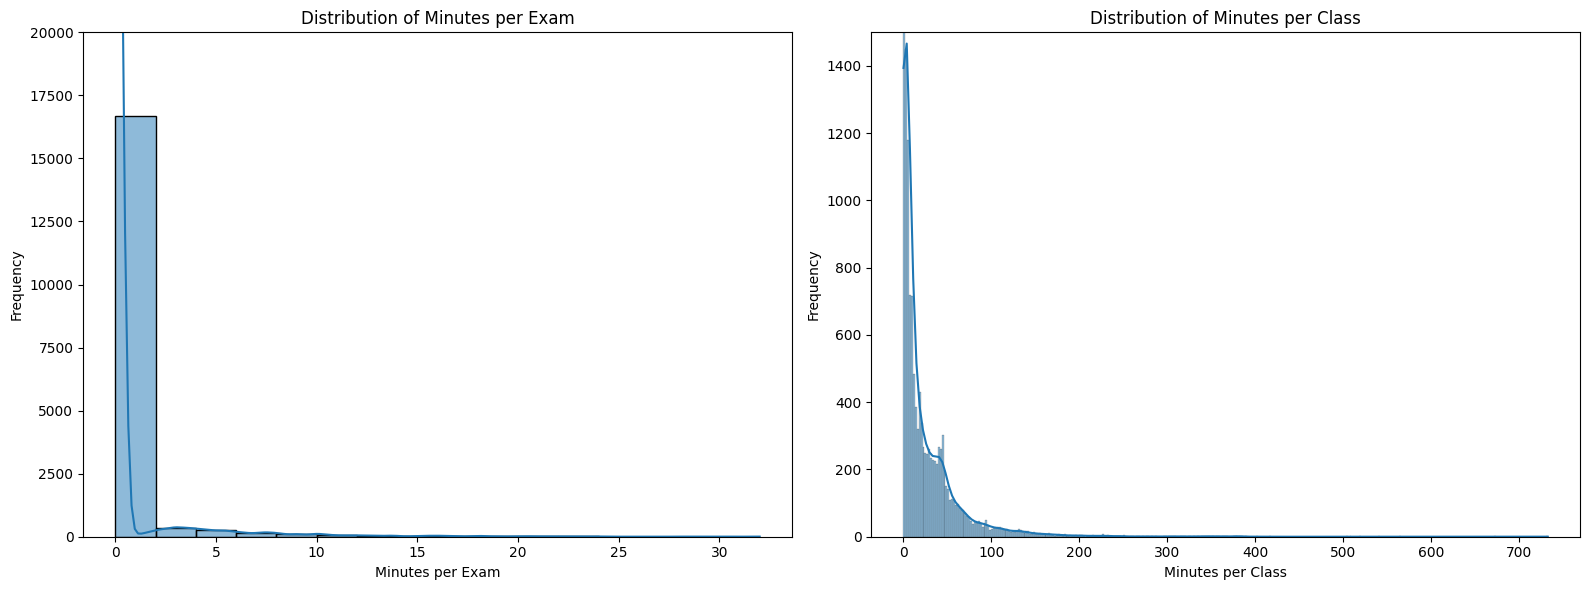

In [8]:
# Check the distribution for our mins_per_exams and mins_per_class
# in order to analysis the hypothesis in our report

# Set up the subplot for two visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Distribution plot for mins_per_exams
sns.histplot(df['mins_per_exams'].dropna(), kde=True, ax=ax1)
ax1.set_title('Distribution of Minutes per Exam')
ax1.set_xlabel('Minutes per Exam')
ax1.set_ylabel('Frequency')
ax1.set_ylim(0, 20000)

# Distribution plot for mins_per_class
sns.histplot(df['mins_per_class'].dropna(), kde=True, ax=ax2)
ax2.set_title('Distribution of Minutes per Class')
ax2.set_xlabel('Minutes per Class')
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 1500)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

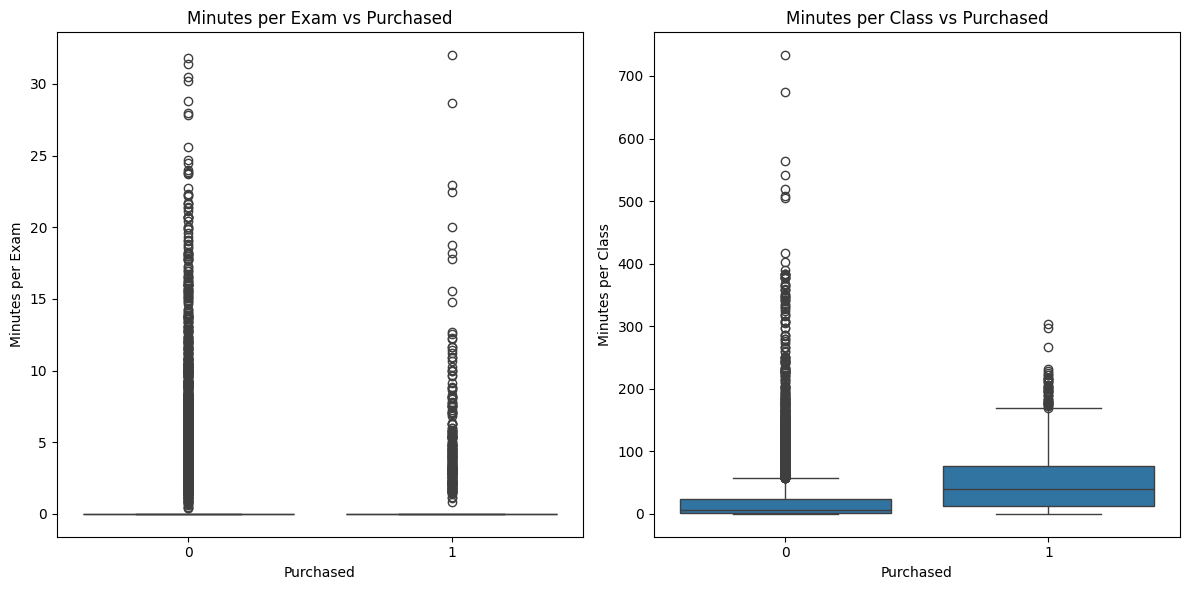

In [9]:
# Check the distribution for our mins_per_exams and mins_per_class in total purchased
# in order to analysis the hypothesis in our report


# Set up the plot
plt.figure(figsize=(12, 6))

# Create box plots
sns.boxplot(x='purchased', y='mins_per_exams', data=df, ax=plt.subplot(121))
sns.boxplot(x='purchased', y='mins_per_class', data=df, ax=plt.subplot(122))

# Customize the first subplot
plt.subplot(121)
plt.title('Minutes per Exam vs Purchased')
plt.xlabel('Purchased')
plt.ylabel('Minutes per Exam')

# Customize the second subplot
plt.subplot(122)
plt.title('Minutes per Class vs Purchased')
plt.xlabel('Purchased')
plt.ylabel('Minutes per Class')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
# Discovery the valve based on country

([0, 1, 2, 3, 4],
 [Text(0, 0, 'US'),
  Text(1, 0, 'IN'),
  Text(2, 0, 'GB'),
  Text(3, 0, 'NG'),
  Text(4, 0, 'EG')])

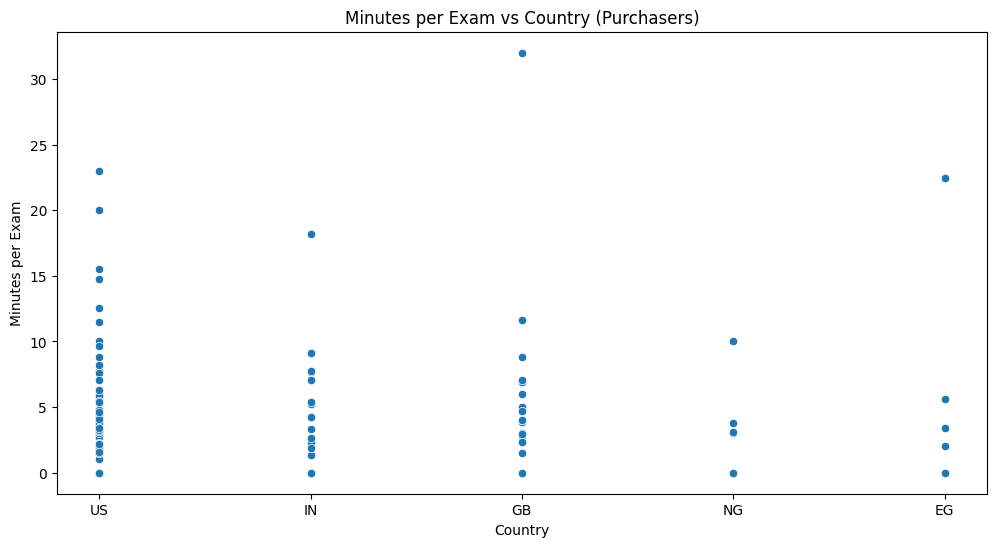

In [11]:
# Check the distribution for mins_per_exams in based on country 
# in order to analysis the hypothesis in our report

# Filter the data for specified countries and purchased == 1
filtered_df = df[(df['student_country'].isin(['IN', 'US', 'EG', 'NG', 'GB'])) & (df['purchased'] == 1)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Create box plot
sns.scatterplot(x='student_country', y='mins_per_exams', data=filtered_df)

# Customize the plot
plt.title('Minutes per Exam vs Country (Purchasers)')
plt.xlabel('Country')
plt.ylabel('Minutes per Exam')
plt.xticks(rotation=0)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'US'),
  Text(1, 0, 'IN'),
  Text(2, 0, 'GB'),
  Text(3, 0, 'NG'),
  Text(4, 0, 'EG')])

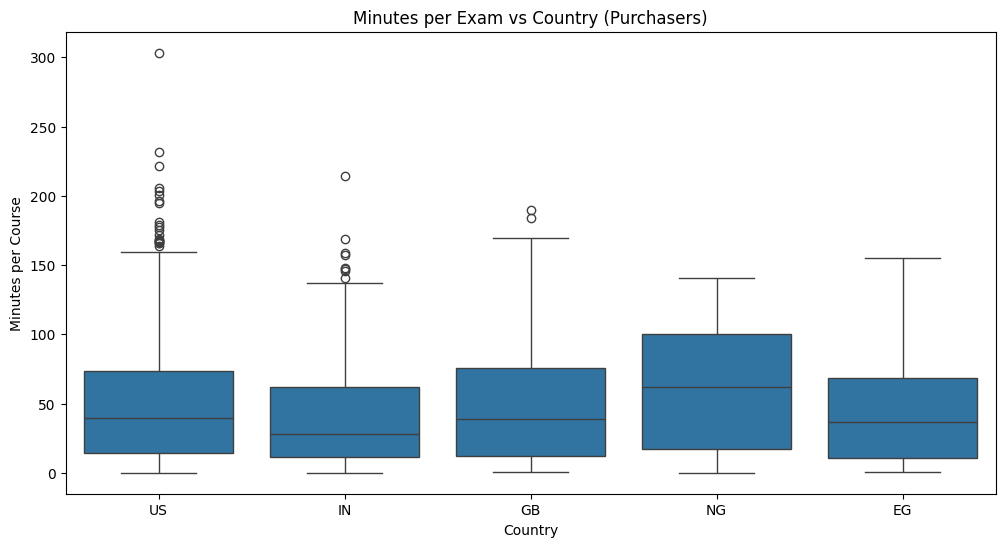

In [12]:
# Check the distribution for mins_per_course in based on country 

# Filter the data for specified countries and purchased == 0
filtered_df = df[(df['student_country'].isin(['IN', 'US', 'EG', 'NG', 'GB'])) & (df['purchased'] == 1)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(x='student_country', y='mins_per_class', data=filtered_df)

# Customize the plot
plt.title('Minutes per Exam vs Country (Purchasers)')
plt.xlabel('Country')
plt.ylabel('Minutes per Course')
plt.xticks(rotation=0)

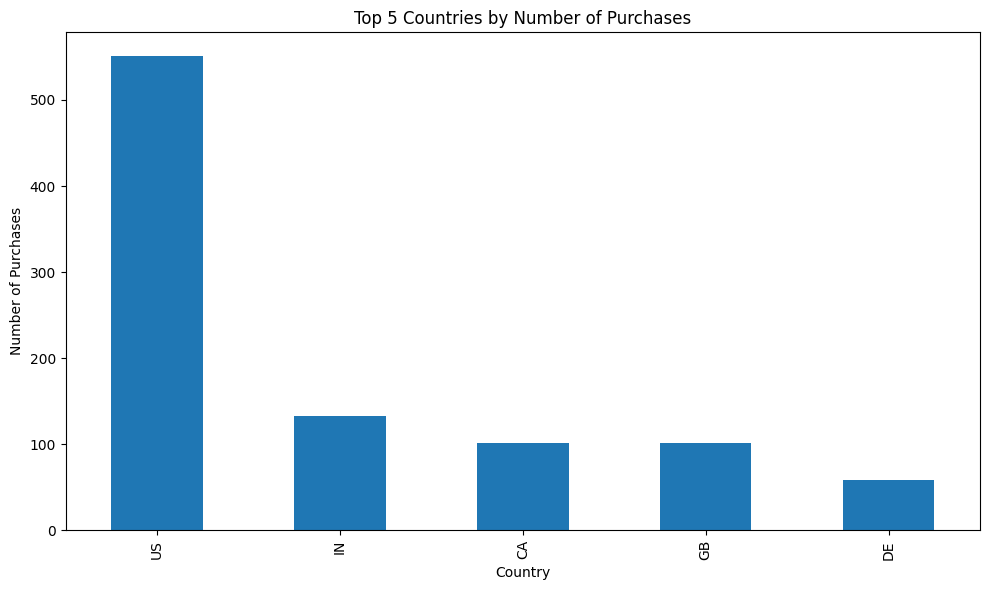

In [14]:
# Check the 'purchsed' disturbution based on country 
# in order to analysis the hypothesis in our report
grouped = df[df['purchased'] == 1].groupby('student_country').size().sort_values(ascending=False)
top_5 = grouped.head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar')
plt.title('Top 5 Countries by Number of Purchases')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

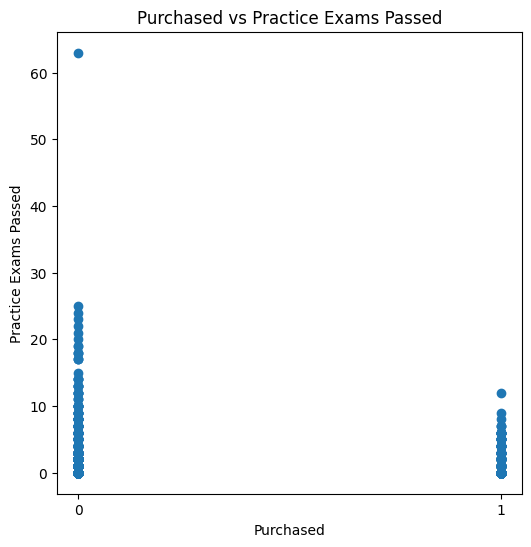

In [17]:
# Plot the disturbution between practice_exams_passed and exam
# in order to analysis the hypothesis in our report

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(df['purchased'], df['practice_exams_passed'])

# Add labels and title
plt.xlabel('Purchased')
plt.ylabel('Practice Exams Passed')
plt.title('Purchased vs Practice Exams Passed')

# Since 'purchased' is likely binary (0 or 1), we can set the x-axis ticks
plt.xticks([0, 1])

# Show the plot
plt.show()

### Data cleaning & analysis - country

In [42]:
# Group by country and count purchases
grouped = df.groupby('student_country')['purchased'].value_counts().unstack(fill_value=0)

# Calculate the total number of students per country
total_students = grouped.sum(axis=1)
purchase_percentage = grouped[1] / total_students * 100

# Add the total number and percentage column to the grouped dataframe
grouped['total'] = total_students
grouped['purchase_percentage'] = purchase_percentage

# Sorted by total purchase in different country
grouped = grouped.sort_values(['total', 'purchase_percentage'], ascending=False)
grouped

purchased,0,1,total,purchase_percentage
student_country,,,,
IN,3232,133,3365,3.952452
US,1900,551,2451,22.480620
EG,1441,25,1466,1.705321
NG,845,37,882,4.195011
GB,715,101,816,12.377451
...,...,...,...,...
SR,1,0,1,0.000000
TD,1,0,1,0.000000
TT,1,0,1,0.000000


In [43]:
# Sorted by purchase_percentage in different country
filtered_by_purchased = grouped.sort_values('purchase_percentage', ascending=False)
filtered_by_purchased.head(10)

purchased,0,1,total,purchase_percentage
student_country,,,,
NE,1,2,3,66.666667
VC,1,1,2,50.000000
FJ,1,1,2,50.000000
HR,4,4,8,50.000000
BO,3,2,5,40.000000
EE,7,4,11,36.363636
BS,2,1,3,33.333333
LV,2,1,3,33.333333
BJ,2,1,3,33.333333


In [44]:
# Create a new column 'region' by mapping 'student_country' using the dictionary
country_to_region = {
    'AE': 'Asia', 'AG': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa', 
    'AR': 'South America', 'AT': 'Europe', 'AU': 'Oceania', 'AW': 'North America', 
    'AZ': 'Asia', 'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe', 
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa', 'BJ': 'Africa', 
    'BM': 'North America', 'BO': 'South America', 'BR': 'South America', 'BS': 'North America', 
    'BT': 'Asia', 'BW': 'Africa', 'BY': 'Europe', 'BZ': 'North America', 'CA': 'North America', 
    'CD': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa', 'CL': 'South America', 
    'CM': 'Africa', 'CN': 'Asia', 'CO': 'South America', 'CR': 'North America', 'CY': 'Europe', 
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe', 'DM': 'North America', 
    'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America', 'EE': 'Europe', 'EG': 'Africa', 
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania', 'FR': 'Europe', 'GA': 'Africa', 
    'GB': 'Europe', 'GD': 'North America', 'GE': 'Asia', 'GH': 'Africa', 'GM': 'Africa', 
    'GN': 'Africa', 'GR': 'Europe', 'GT': 'North America', 'GU': 'Oceania', 'HK': 'Asia', 
    'HN': 'North America', 'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia', 
    'IE': 'Europe', 'IL': 'Asia', 'IN': 'Asia', 'IQ': 'Asia', 'IS': 'Europe', 'IT': 'Europe', 
    'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia', 'JP': 'Asia', 'KE': 'Africa', 
    'KG': 'Asia', 'KH': 'Asia', 'KM': 'Africa', 'KR': 'Asia', 'KW': 'Asia', 'KZ': 'Asia', 
    'LA': 'Asia', 'LB': 'Asia', 'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe', 
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa', 'MD': 'Europe', 'ME': 'Europe', 
    'MG': 'Africa', 'MK': 'Europe', 'ML': 'Africa', 'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 
    'MR': 'Africa', 'MT': 'Europe', 'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America', 
    'MY': 'Asia', 'MZ': 'Africa', 'NA': 'Africa', 'NE': 'Africa', 'NG': 'Africa', 'NI': 'North America', 
    'NL': 'Europe', 'NO': 'Europe', 'NP': 'Asia', 'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 
    'PE': 'South America', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia', 'PL': 'Europe', 'PR': 'North America', 
    'PS': 'Asia', 'PT': 'Europe', 'PY': 'South America', 'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 
    'RS': 'Europe', 'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SD': 'Africa', 'SE': 'Europe', 
    'SG': 'Asia', 'SI': 'Europe', 'SK': 'Europe', 'SL': 'Africa', 'SN': 'Africa', 'SO': 'Africa', 
    'SR': 'South America', 'SV': 'North America', 'SZ': 'Africa', 'TD': 'Africa', 'TG': 'Africa', 
    'TH': 'Asia', 'TJ': 'Asia', 'TN': 'Africa', 'TR': 'Asia', 'TT': 'North America', 'TW': 'Asia', 
    'TZ': 'Africa', 'UA': 'Europe', 'UG': 'Africa', 'US': 'North America', 'UY': 'South America', 
    'UZ': 'Asia', 'VC': 'North America', 'VE': 'South America', 'VN': 'Asia', 'VU': 'Oceania', 
    'XK': 'Europe', 'YE': 'Asia', 'ZA': 'Africa', 'ZM': 'Africa', 'ZW': 'Africa'
}

df['region'] = df['student_country'].map(country_to_region)
df.drop('student_country', axis = 1, inplace = True)
df.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,mins_per_exams,mins_per_class,region
0,288,358.1,1,2,2,15.81,0,7.905,358.1,North America
1,260,1.7,1,1,0,16.00,0,0.000,1.7,Asia
2,260,22.4,1,1,0,0.93,0,0.000,22.4,Asia
3,259,18.8,1,1,1,14.63,0,14.630,18.8,Africa
4,259,118.0,2,2,1,16.48,0,16.480,59.0,Asia


In [45]:
# use get dummy function to change region to new variable
df_with_dummies = pd.get_dummies(df, columns=['region'])
# replace True/Flase to numeric variable
df_with_dummies = df_with_dummies.replace({False: 0, True: 1})
df_with_dummies.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,mins_per_exams,mins_per_class,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,288,358.1,1,2,2,15.81,0,7.905,358.1,0,0,0,1,0,0
1,260,1.7,1,1,0,16.00,0,0.000,1.7,0,1,0,0,0,0
2,260,22.4,1,1,0,0.93,0,0.000,22.4,0,1,0,0,0,0
3,259,18.8,1,1,1,14.63,0,14.630,18.8,1,0,0,0,0,0
4,259,118.0,2,2,1,16.48,0,16.480,59.0,0,1,0,0,0,0


## Heatmap

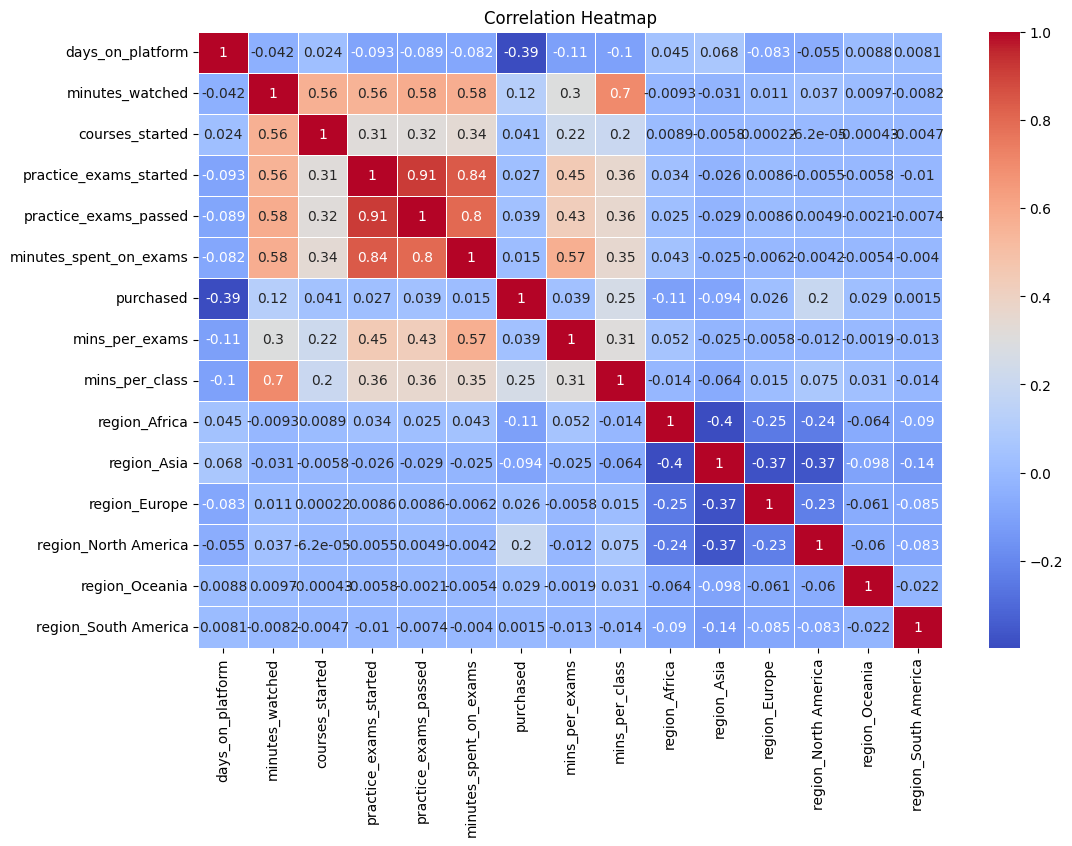

In [46]:
# Create a heatmap
heatmap = df_with_dummies.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Features choosing
we test all the coulumns, and find out find out even though breaking down student countries
into region, accuracy is even getting better but worse. Thus, we decided to stay out of country
realted columns to minimize the noise & maximize the optimization

## Data Model
we try all of the data models from disclamer, and deciding one model according to the highest percision
of customers who purchased the membership

In [47]:
# Logistic

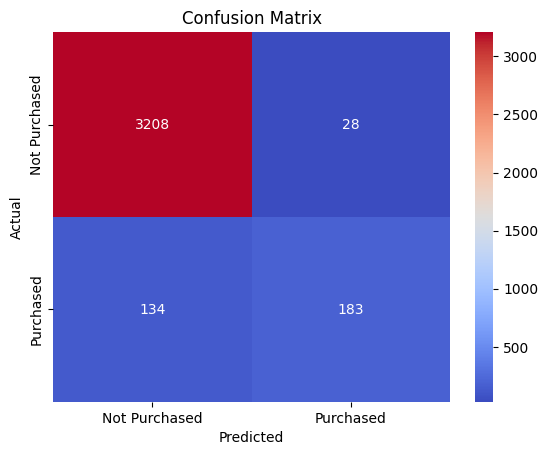

Accuracy: 0.9544
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3236
           1       0.87      0.58      0.69       317

    accuracy                           0.95      3553
   macro avg       0.91      0.78      0.83      3553
weighted avg       0.95      0.95      0.95      3553



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Preprocess the data
X = df_with_dummies.drop([
# 'days_on_platform',
# 'minutes_watched',
# 'courses_started',
# 'practice_exams_started',
# 'practice_exams_passed',
# 'minutes_spent_on_exams',
 'purchased',
 'region_Africa',
 'region_Asia',
 'region_Europe',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'mins_per_exams',
 'mins_per_class'
], axis = 1)
y = df_with_dummies['purchased']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the test set
y_pred = logreg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Classification Report
print(classification_report(y_test, y_pred))

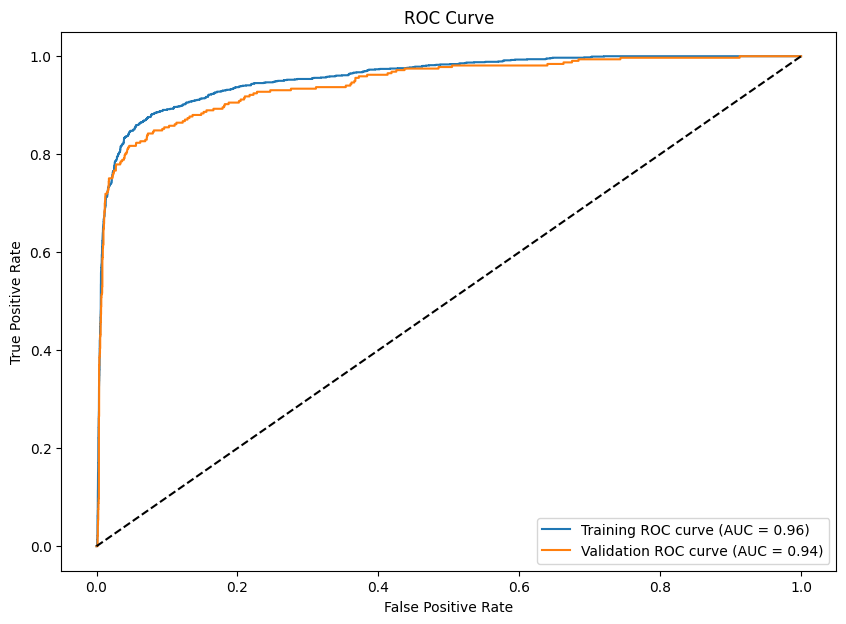

In [49]:
# evalution the model using ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_train_pred_proba = logreg.predict_proba(X_train)[:, 1]
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

# Calculate ROC curve and AUC for validation set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_train, tpr_train, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Validation ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()


In [50]:
# DecisionTree

Accuracy: 0.9361

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3236
           1       0.64      0.65      0.64       317

    accuracy                           0.94      3553
   macro avg       0.80      0.81      0.80      3553
weighted avg       0.94      0.94      0.94      3553



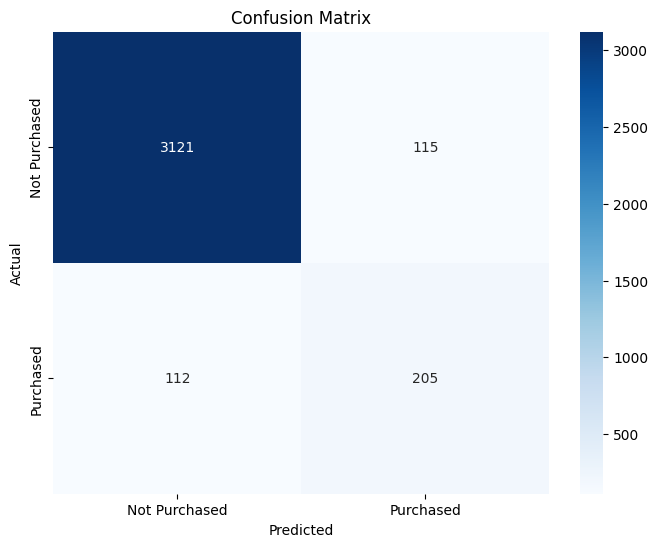

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# RandomForest

Accuracy: 0.9524

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3236
           1       0.77      0.67      0.71       317

    accuracy                           0.95      3553
   macro avg       0.87      0.82      0.84      3553
weighted avg       0.95      0.95      0.95      3553



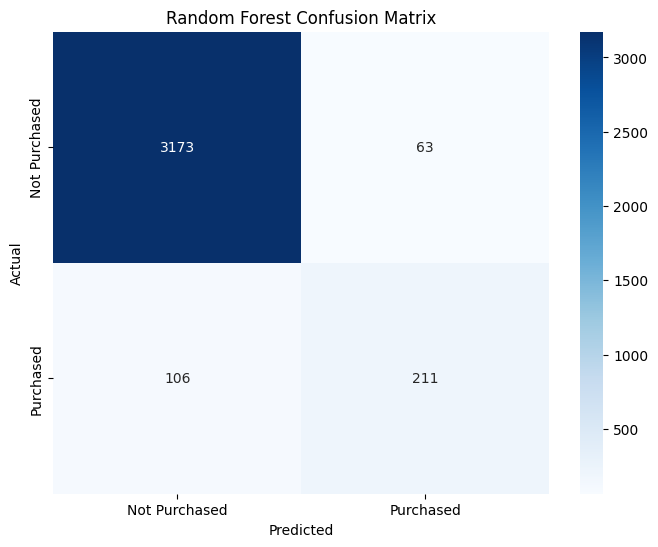

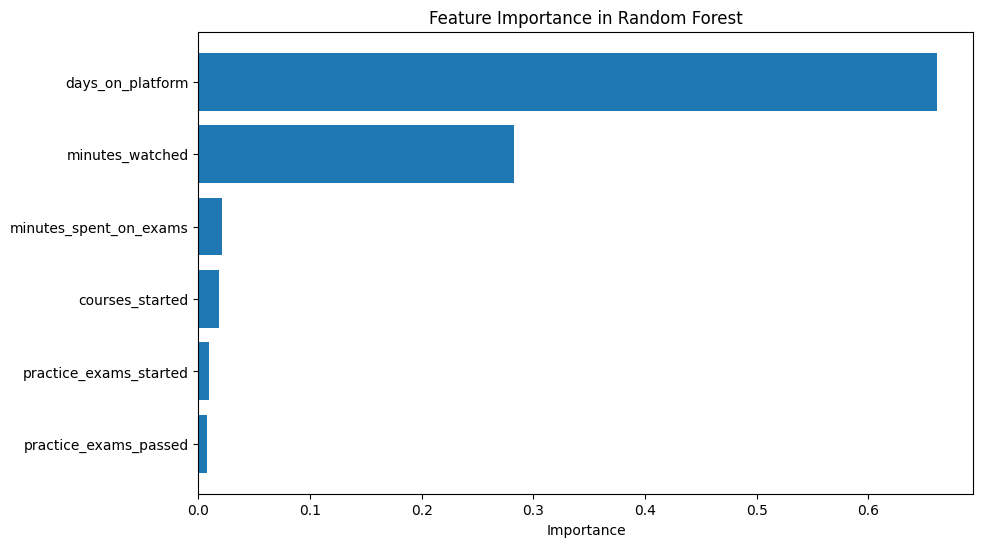

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_with_dummies.drop([
# 'days_on_platform',
# 'minutes_watched',
# 'courses_started',
# 'practice_exams_started',
# 'practice_exams_passed',
# 'minutes_spent_on_exams',
 'purchased',
 'region_Africa',
 'region_Asia',
 'region_Europe',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'mins_per_exams',
 'mins_per_class'
], axis = 1)
y = df_with_dummies['purchased']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate and print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.show()

In [56]:
# SVC

Accuracy: 0.9513


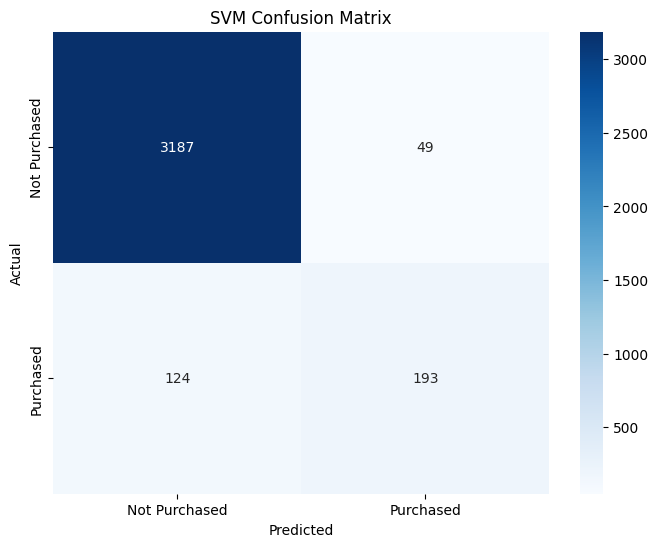


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3236
           1       0.80      0.61      0.69       317

    accuracy                           0.95      3553
   macro avg       0.88      0.80      0.83      3553
weighted avg       0.95      0.95      0.95      3553



In [63]:
from sklearn.svm import SVC

X = df_with_dummies.drop([
# 'days_on_platform',
# 'minutes_watched',
# 'courses_started',
# 'practice_exams_started',
# 'practice_exams_passed',
# 'minutes_spent_on_exams',
 'purchased',
 'region_Africa',
 'region_Asia',
 'region_Europe',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'mins_per_exams',
 'mins_per_class'
], axis = 1)
y = df_with_dummies['purchased']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [57]:
# KNeighborsClassifier

Accuracy: 0.9578


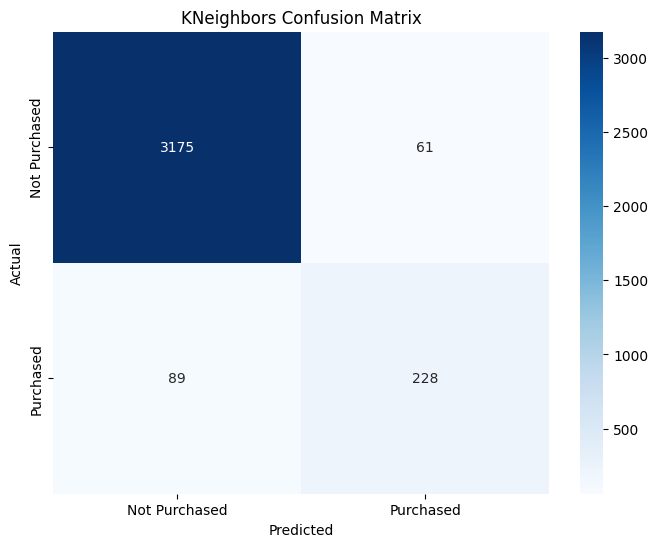

Classification Report for Test Set (K-NN):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3236
           1       0.79      0.72      0.75       317

    accuracy                           0.96      3553
   macro avg       0.88      0.85      0.86      3553
weighted avg       0.96      0.96      0.96      3553



In [64]:
from sklearn.neighbors import KNeighborsClassifier

X = df_with_dummies.drop([
# 'days_on_platform',
# 'minutes_watched',
# 'courses_started',
# 'practice_exams_started',
# 'practice_exams_passed',
# 'minutes_spent_on_exams',
 'purchased',
 'region_Africa',
 'region_Asia',
 'region_Europe',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'mins_per_exams',
 'mins_per_class'
], axis = 1)

y = df_with_dummies['purchased']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5) # You can choose the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('KNeighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for testing set
print('Classification Report for Test Set (K-NN):')
print(classification_report(y_test, y_pred))